/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_8366/1674215287.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_8366/1674215287.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)


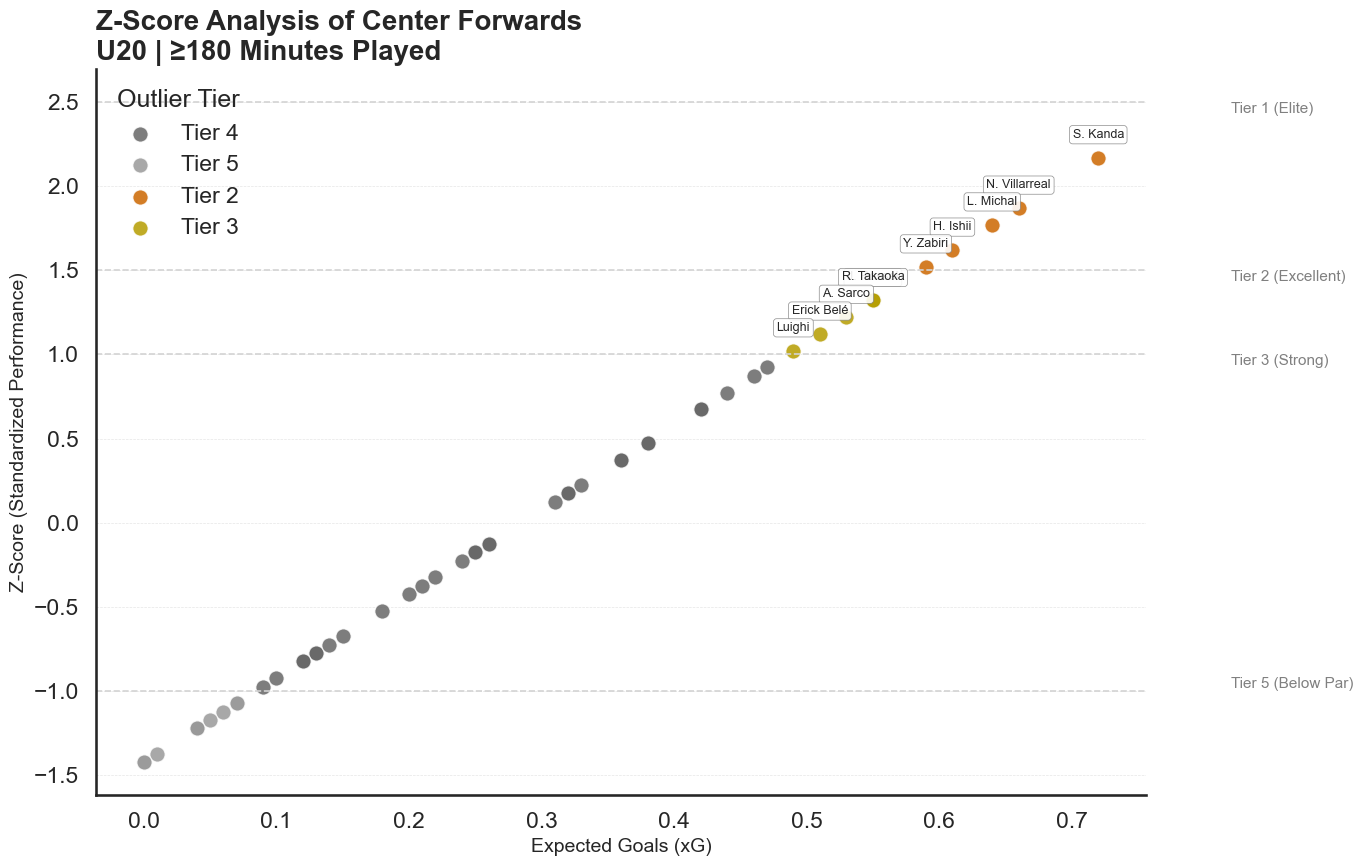

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

# Load and filter data
file_path = '/Users/user/Downloads/U20 WC.xlsx'
df = pd.read_excel(file_path)
df_filtered = df[(df['Minutes played'] >= 180) & (df['Position'].str.contains('CF', na=False))]

# Compute z-scores
metric_col = 'xG per 90'
mean = df_filtered[metric_col].mean()
std = df_filtered[metric_col].std()
df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std

# Classify into tiers
def classify_tier(z):
    if z > 2.5:
        return 'Tier 1'
    elif 1.5 < z <= 2.5:
        return 'Tier 2'
    elif 1.0 < z <= 1.5:
        return 'Tier 3'
    elif z < -1.0:
        return 'Tier 5'
    else:
        return 'Tier 4'

df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)

# Plot styling
sns.set_context("talk")
sns.set_style("white")

tier_colors = {
    'Tier 1': '#990000',
    'Tier 2': '#cc6600',
    'Tier 3': '#b59d00',
    'Tier 4': '#666666',
    'Tier 5': '#999999'
}

# Create plot
fig, ax = plt.subplots(figsize=(14, 9))

# Plot data by tier
for tier in df_filtered['Outlier_Tier'].unique():
    tier_df = df_filtered[df_filtered['Outlier_Tier'] == tier]
    ax.scatter(tier_df[metric_col], tier_df['z_score'],
               label=tier,
               s=120,
               alpha=0.85,
               color=tier_colors[tier],
               edgecolor='white',
               linewidth=0.75)

# Tier lines and labels
tier_lines = {
    'Tier 1 (Elite)': 2.5,
    'Tier 2 (Excellent)': 1.5,
    'Tier 3 (Strong)': 1.0,
    'Tier 5 (Below Par)': -1.0
}
for label, y in tier_lines.items():
    ax.axhline(y=y, color='lightgray', linestyle='--', linewidth=1.2, zorder=1)
    ax.text(df_filtered[metric_col].max() + 0.1, y, label,
            fontsize=11, va='bottom' if y < 0 else 'top',
            ha='left', color='gray')

# Boxed annotations for Tier 1–3
highlight_df = df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2', 'Tier 3'])]
for _, row in highlight_df.iterrows():
    ax.text(row[metric_col], row['z_score'] + 0.1, row['Player'],
            fontsize=9,
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.25", fc='white', ec='gray', lw=0.5, alpha=0.9))

# Axis labels and title
ax.set_title("Z-Score Analysis of Center Forwards\nU20 | ≥180 Minutes Played", fontsize=20, weight='bold', loc='left')
ax.set_xlabel("Expected Goals (xG)", fontsize=14)
ax.set_ylabel("Z-Score (Standardized Performance)", fontsize=14)

# Legend and finishing touches
ax.legend(title='Outlier Tier', frameon=False, loc='upper left')
sns.despine()
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.savefig("/Users/user/u20_cf_zscore_boxlabels.png", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_44774/589973832.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_44774/589973832.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)


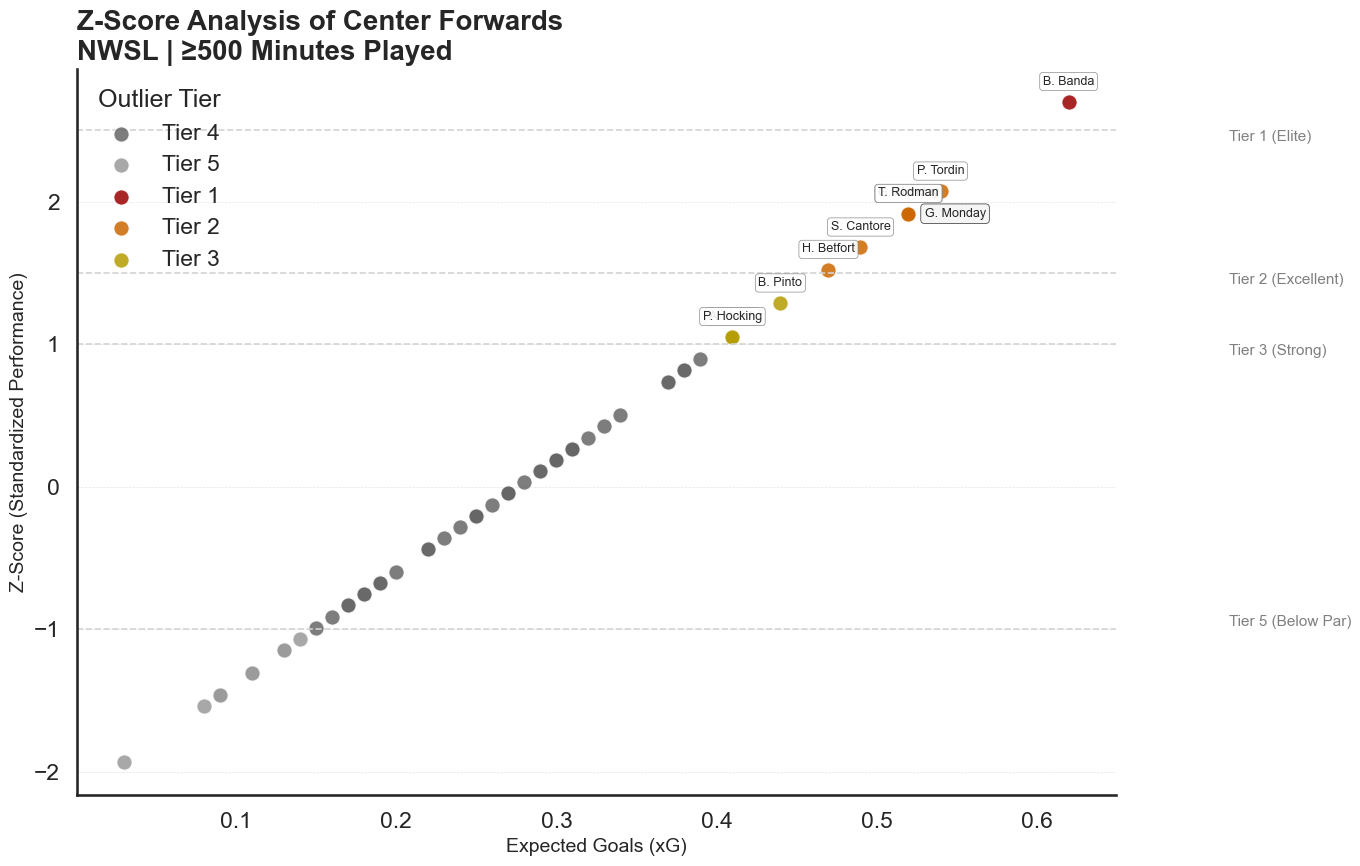

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

# Load and filter data
file_path = '/Users/user/Downloads/NWSL 2025.xlsx'
df = pd.read_excel(file_path)
df_filtered = df[(df['Minutes played'] >= 500) & (df['Position'].str.contains('CF', na=False))]

# Compute z-scores
metric_col = 'xG per 90'
mean = df_filtered[metric_col].mean()
std = df_filtered[metric_col].std()
df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std

# Classify into tiers
def classify_tier(z):
    if z > 2.5:
        return 'Tier 1'
    elif 1.5 < z <= 2.5:
        return 'Tier 2'
    elif 1.0 < z <= 1.5:
        return 'Tier 3'
    elif z < -1.0:
        return 'Tier 5'
    else:
        return 'Tier 4'

df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)

# Plot styling
sns.set_context("talk")
sns.set_style("white")

tier_colors = {
    'Tier 1': '#990000',
    'Tier 2': '#cc6600',
    'Tier 3': '#b59d00',
    'Tier 4': '#666666',
    'Tier 5': '#999999'
}

# Create plot
fig, ax = plt.subplots(figsize=(14, 9))

# Plot data by tier
for tier in df_filtered['Outlier_Tier'].unique():
    tier_df = df_filtered[df_filtered['Outlier_Tier'] == tier]
    ax.scatter(tier_df[metric_col], tier_df['z_score'],
               label=tier,
               s=120,
               alpha=0.85,
               color=tier_colors[tier],
               edgecolor='white',
               linewidth=0.75)

# Tier lines and labels
tier_lines = {
    'Tier 1 (Elite)': 2.5,
    'Tier 2 (Excellent)': 1.5,
    'Tier 3 (Strong)': 1.0,
    'Tier 5 (Below Par)': -1.0
}
for label, y in tier_lines.items():
    ax.axhline(y=y, color='lightgray', linestyle='--', linewidth=1.2, zorder=1)
    ax.text(df_filtered[metric_col].max() + 0.1, y, label,
            fontsize=11, va='bottom' if y < 0 else 'top',
            ha='left', color='gray')

# Boxed annotations for Tier 1–3
highlight_df = df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2', 'Tier 3'])]
for _, row in highlight_df.iterrows():
    ax.text(row[metric_col], row['z_score'] + 0.1, row['Player'],
            fontsize=9,
            ha='center',
            va='bottom',
            bbox=dict(boxstyle="round,pad=0.25", fc='white', ec='gray', lw=0.5, alpha=0.9))

# --- Always label G. Monday, label shifted to the right ---
gmonday = df_filtered[df_filtered['Player'].str.contains('G. Monday', case=False, na=False)]
for _, row in gmonday.iterrows():
    ax.text(row[metric_col] + 0.01, row['z_score'], row['Player'],
            fontsize=9,
            ha='left',
            va='center',
            bbox=dict(boxstyle="round,pad=0.3", fc='#f5f5f5', ec='#444444', lw=0.6, alpha=0.95))

# Axis labels and title
ax.set_title("Z-Score Analysis of Center Forwards\nNWSL | ≥500 Minutes Played",
             fontsize=20, weight='bold', loc='left')
ax.set_xlabel("Expected Goals (xG)", fontsize=14)
ax.set_ylabel("Z-Score (Standardized Performance)", fontsize=14)

# Legend and finishing touches
ax.legend(title='Outlier Tier', frameon=False, loc='upper left')
sns.despine()
ax.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.savefig("/Users/user/germany_cf_zscore_boxlabels.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_44774/318500204.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_44774/318500204.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)
/var/folders/vh/gd9x5_d94g33w411t0md800c0000gn/T/ipykernel_44774/318500204.py:33: SettingWithCopyWarning: 
A value is 

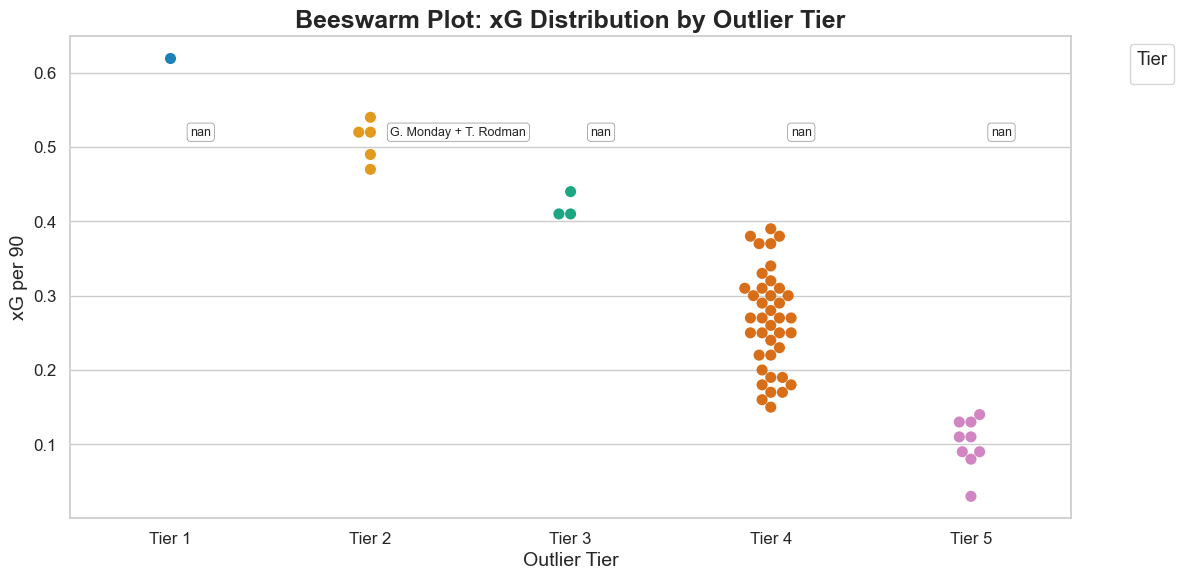

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
file_path = '/Users/user/Downloads/NWSL 2025.xlsx'
df = pd.read_excel(file_path)

# Filter and prepare
df_filtered = df[(df['Minutes played'] >= 500) & (df['Position'].str.contains('CF', na=False))]
metric_col = 'xG per 90'
mean = df_filtered[metric_col].mean()
std = df_filtered[metric_col].std()
df_filtered['z_score'] = (df_filtered[metric_col] - mean) / std

# Classify tiers
def classify_tier(z):
    if z > 2.5:
        return 'Tier 1'
    elif 1.5 < z <= 2.5:
        return 'Tier 2'
    elif 1.0 < z <= 1.5:
        return 'Tier 3'
    elif z < -1.0:
        return 'Tier 5'
    else:
        return 'Tier 4'

df_filtered['Outlier_Tier'] = df_filtered['z_score'].apply(classify_tier)

# Force correct tier order
tier_order = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4', 'Tier 5']
df_filtered['Outlier_Tier'] = pd.Categorical(df_filtered['Outlier_Tier'], categories=tier_order, ordered=True)

# Plot setup
sns.set(style="whitegrid", palette="colorblind", font_scale=1.1)
plt.figure(figsize=(12, 6))

# Beeswarm plot
ax = sns.swarmplot(data=df_filtered, x='Outlier_Tier', y=metric_col, hue='Outlier_Tier',
                   order=tier_order, dodge=False, alpha=0.9, size=8)

# --- Label only duplicate values in Tier 1 and 2 ---
top_tiers = df_filtered[df_filtered['Outlier_Tier'].isin(['Tier 1', 'Tier 2'])]

# Find groups with duplicates (2+ players) per tier and xG value
duplicates = (
    top_tiers.groupby(['Outlier_Tier', metric_col])
    .filter(lambda g: len(g) > 1)  # keep only duplicates
)

# Combine player names for each duplicate group
grouped = (
    duplicates.groupby(['Outlier_Tier', metric_col])['Player']
    .apply(lambda names: ' + '.join(sorted(names)))
    .reset_index()
)

# Add labels for duplicate-value groups
for _, row in grouped.iterrows():
    x_pos = tier_order.index(row['Outlier_Tier'])
    ax.text(x_pos + 0.1, row[metric_col], row['Player'],
            fontsize=9, ha='left', va='center',
            bbox=dict(boxstyle="round,pad=0.25", fc='white', ec='gray', lw=0.5, alpha=0.9))

# Titles and labels
plt.title('Beeswarm Plot: xG Distribution by Outlier Tier', fontsize=18, weight='bold')
plt.xlabel('Outlier Tier', fontsize=14)
plt.ylabel('xG per 90', fontsize=14)
plt.legend(title='Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
